In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# New Line Usage Evolution

In this notebook we'll take a look at how the number of riders changes on Line 3 as time passes after its opening. First load in data from the week right before opening, the week after opening, and for a month after opening (the latest that we have).

In [6]:
week_before = ['201503{}'.format(d) for d in range(25,32)]
week_after = ['2015040{}'.format(d) for d in range(1,8)]
month_after = ['201504{}'.format(d) for d in range(24,31)]

header = pd.read_csv('../nanjing-data/header.csv')

In [13]:
def reader(week):
    df = {}
    
    for date in week:
    
        # attach header
        df[date] = pd.read_csv('../nanjing-data/{}.csv'.format(date), header=None)
        df[date].columns = header.columns
        
        # drop all but station entrances
        df[date] = df[date].loc[df[date]['Entry_Or_Exit'] == 1,:]

        # drop unnecessary columns
        df[date].drop(labels=['Card_Id', 'Card_Id_Long', 'Card_Type', 'Fare', 'Device_Id', 'Entry_Or_Exit'], axis=1, inplace=True) #StationId too possibly

        # convert datetime
        df[date]['Time'] = pd.to_datetime(df[date]['Time'])
    
    return df

In [14]:
dfwb = reader(week_before)
dfwa = reader(week_after)
dfma = reader(month_after)
dfwb[week_before[0]].head()

,Time,Line_Id,StationId
0,2015-03-25 06:10:09,4,1
1,2015-03-25 07:00:17,4,1
2,2015-03-25 07:08:18,4,1
3,2015-03-25 07:11:52,4,1
4,2015-03-25 06:34:48,4,1


In [52]:
def usage_week(week, df, line3=False):
    if line3:
        # stacked bar chart with line 4 on top
        usage = {}
        usage['other'] = [np.sum(df[day]['Line_Id'] != 7) for day in week] # usage not on line 3
        usage['line3'] = [np.sum(df[day]['Line_Id'] == 7) for day in week] # usage on line 3

#         plt.barh(ind, usage['line3'], width)
#         plot = plt.barh(ind, usage['other'], width, left=usage['line3'])
    else:
        # regular bar chart
        usage = [df[day].shape[0] for day in week]

#         plot = plt.barh(ind, usage, width)
        
    return usage

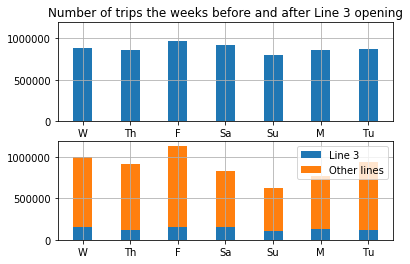

In [53]:
usage_wb = usage_week(week_before, dfwb)
usage_wa = usage_week(week_after, dfwa, line3=True)

ind = np.arange(7)
width = 0.4
open_labels = ['W','Th','F','Sa','Su','M','Tu']

ax1 = plt.subplot(211)
plt.bar(ind, usage_wb, width)
plt.grid()
plt.title('Number of trips the weeks before and after Line 3 opening')

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
plt.bar(ind, usage_wa['line3'], width, label='Line 3')
plt.bar(ind, usage_wa['other'], width, bottom=usage_wa['line3'], label='Other lines')
plt.xticks(ind,open_labels)
plt.legend()
plt.grid()

plt.show()

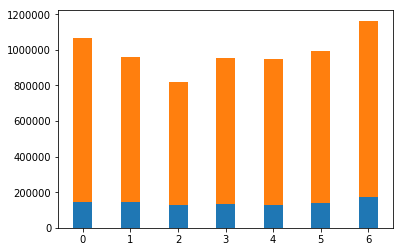

In [54]:
usage_ma = usage_week(month_after, dfma, line3=True)
plt.bar(ind, usage_ma['line3'], width, label='Line 3')
plt.bar(ind, usage_ma['other'], width, bottom=usage_ma['line3'], label='Other Lines')
plt.show()

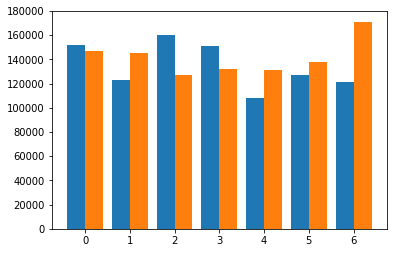

In [58]:
plt.bar(ind, usage_wa['line3'], width, label='Week after')
plt.bar(ind+width, usage_ma['line3'], width, label='Month after')
plt.xticks(ind+width/2, np.arange(7))
plt.show()